In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Dependencies
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [17]:
os.chdir(os.path.join('..','..','..','..','..','..'))
curr_working_directory = os.getcwd()
os.getcwd()
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [18]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [19]:
target_terms = ('@BBC','@Fox','@CNN','@CBS','@nytimes')

tweets = []
target_list = []
user_list = []
compound_list = []
tweet_id = []
created_at = []
favorite_count = []
tweet_text_list = []
pos_list = []
neg_list = []
neu_list = []
api = tweepy.API(auth)

In [20]:
for target in target_terms:
    
    for tweet in tweepy.Cursor(api.user_timeline, target, tweet_mode='extended').items(100):
        tweets.append(tweet)
    

In [21]:
len(tweets)

500

In [22]:
for t in tweets:
    tweet_user = t.user.screen_name
    tweet_text = t.full_text
    results = analyzer.polarity_scores(tweet_text)
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    #favorite_count.append(t.favorite_count)
    tweet_text_list.append(tweet_text)
    compound_list.append(compound)
    user_list.append(tweet_user)
    pos_list.append(pos)
    neg_list.append(neg)
    neu_list.append(neu)

In [9]:
tweets_df = pd.DataFrame({
    'User': user_list,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Tweet Text': tweet_text_list,
    'Compound': compound_list,
    'Positive': pos_list,
    'Negative': neg_list,
    'Neutral': neu_list
    })
tweets_df

,User,Tweet ID,Tweet Time,Tweet Text,Compound,Positive,Negative,Neutral
0,BBC,1263907732387553281,2020-05-22 19:01:00,Tonight chatting to #GrahamNorton...\n\n✨ @kat...,0.5374,0.114,0.000,0.886
1,BBC,1263907732299624455,2020-05-22 19:01:00,Piglet rescue! 😭❤️\n\nRoaming In The Wild is s...,0.1260,0.152,0.131,0.718
2,BBC,1263862433891807232,2020-05-22 16:01:00,Here is @matthaig1's simple piece of advice fo...,0.4404,0.172,0.000,0.828
3,BBC,1263861765319819266,2020-05-22 15:58:20,RT @bbcouch: Ouch favourites @MarkOneinFour an...,0.4019,0.124,0.000,0.876
4,BBC,1263854083292762112,2020-05-22 15:27:49,RT @BBCR1: Here's how the #BigWeekend Headline...,0.5093,0.112,0.000,0.888
...,...,...,...,...,...,...,...,...
495,nytimes,1263711227613675520,2020-05-22 06:00:09,Since early December and as recently as last w...,0.0000,0.000,0.000,1.000
496,nytimes,1263707423518441472,2020-05-22 05:45:02,RT @palafo: The Federal Bureau of Investigatio...,-0.5423,0.000,0.137,0.863
497,nytimes,1263703675672895489,2020-05-22 05:30:09,An organization working to prevent pandemics l...,0.0772,0.082,0.052,0.866
498,nytimes,1263696111979712512,2020-05-22 05:00:06,Hong Kong stocks fell by more than 4% in early...,0.0000,0.000,0.000,1.000


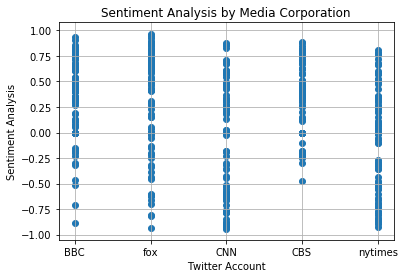

In [15]:
fig = plt.scatter(tweets_df['User'],tweets_df['Compound'])
plt.xlabel("Twitter Account")
plt.ylabel("Sentiment Analysis")
plt.title("Sentiment Analysis by Media Corporation")
plt.grid(True)

#plt.savefig("output_data/twitter.png"
#plt.show()

In [11]:
plt.savefig("output_data/twitter.png"
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/twitter.png'

<Figure size 432x288 with 0 Axes>

In [ ]:
-CBS trends toward a more positive sentiment
-